In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
traj = np.load('trajectory1')
delta=5
tau=500

In [9]:
#xx = [traj['s'].values.ravel()[i] for i in range(len(traj.index))]
traj

,wage,r,s,capital,labor share of gdp,C,P,Y,consensus
time,,,,,,,,,
0.000000,5.000000,0.050000,"[0.128274073351, 0.697030559316, 0.38521391979...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",5.000000,"[0.0871725926649, 0.0302969440684, 0.061478608...",1.0,0.000000,False
0.182134,4.769608,0.052415,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.929483164607, 0.939844006782, 0.93416374981...",4.769608,"[0.0872696063184, 0.0303306612855, 0.061547027...",1.0,9.539216,False
2.047179,2.824731,0.088504,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.259926930672, 0.369204068352, 0.30911681386...",2.824731,"[0.0963346798677, 0.0337590546576, 0.068194859...",1.0,5.649463,False
3.457267,2.131077,0.117312,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.12257295814, 0.221961183759, 0.16521998178,...",2.131077,"[0.0451581977945, 0.0195786962755, 0.035395538...",1.0,4.262155,False
6.476563,0.961923,0.259896,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.0, 0.0642413182484, 0.0158464791331, 0.0365...",0.961923,"[0.0361552235766, 0.0203916745323, 0.032312686...",1.0,1.923847,False
7.497789,0.921504,0.271296,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00124140612696, 0.0568113330008, 0.01474626...",0.921504,"[0.00803298928085, 0.00807214458055, 0.0083082...",1.0,1.843008,False
10.664554,0.795987,0.314075,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00331976758453, 0.0402884113503, 0.01181240...",0.795987,"[0.0072787102454, 0.00781749370456, 0.00774096...",1.0,1.591975,False
11.469303,0.789636,0.316602,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00318275002627, 0.0388741469202, 0.01163192...",0.789636,"[0.00779968050679, 0.00625684522226, 0.0071537...",1.0,1.579271,False
20.904227,0.694917,0.359755,"[0.128274073351, 0.697030559316, 0.38521391979...","[0.00140688900012, 0.0274247822395, 0.00889106...",0.694917,"[0.00705590997079, 0.00634246605352, 0.0068449...",1.0,1.389835,False


In [2]:
N=100
S = np.zeros(shape=(len(traj.index), N))
K = np.zeros(shape=(len(traj.index), N))
C = np.zeros(shape=(len(traj.index), N))
W = np.zeros(shape=(len(traj.index), N))

for a, t in enumerate(traj.index):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    W[a,:] = traj['wage'][t]
        


9883 10133


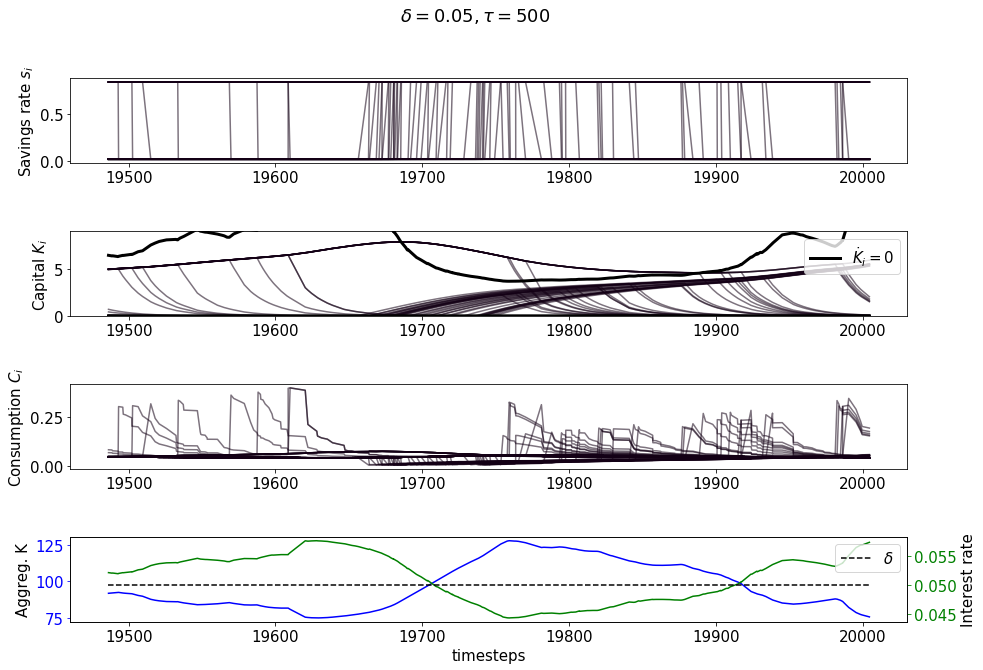

In [323]:
# plot all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))

plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)
fig.subplots_adjust(hspace = .8, wspace=.01);
L=0.05


for a,i in enumerate([range(N)]):
    ax1.plot(traj.index[start:stop],S[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax3.set_ylabel(r'Consumption $C_i$')
ax1.legend()
ax3.legend()
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
    kidotzero_high[np.nonzero(kidotzero_high)],
    'k',lw=3,label=r'$\dot{K}_i=0$');
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
    kidotzero_low[np.nonzero(kidotzero_low)],
    'k',lw=3,label=r'$\dot{K}_i=0$');
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
#ax1.legend();
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
#ax2.set_yscale('log')
ax2.set_ylim(0,9)


ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='g');
ax5.plot(traj.index[start:stop],delta/100. +0*traj.index[start:stop],
         'k--',label=r'$\delta$');
ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
fig.savefig('delta_%s_start%s_stop%s_three.pdf'%(delta,start,stop))


0 1000


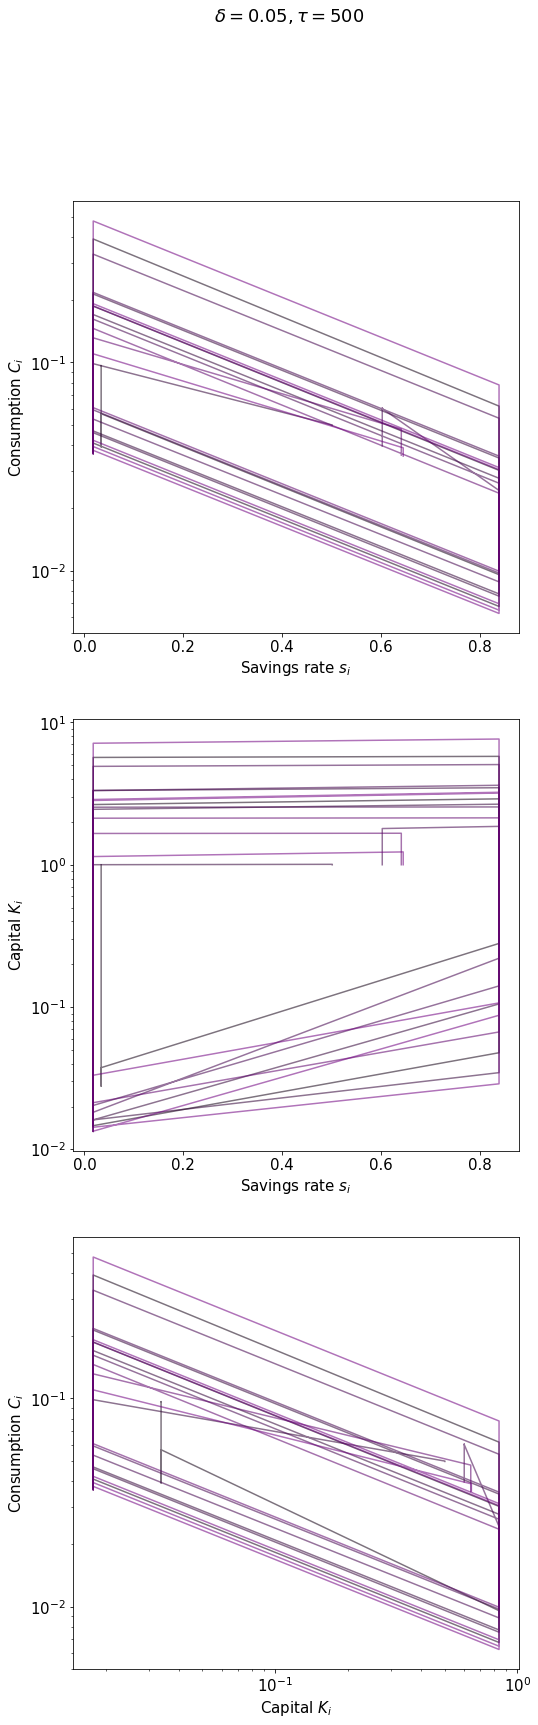

In [343]:
# phaseplots of all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8,27))
#fig.subplots_adjust(wspace=1.2);


plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 0,1000 # len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)

L=0.05


for a,i in enumerate(range(5)):
    ax1.plot(S[start:stop,i], C[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax1.set_ylabel(r'Consumption $C_i$')
    ax1.set_xlabel(r'Savings rate $s_i$')

    ax2.plot( S[start:stop,i],K[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax2.set_xlabel(r'Savings rate $s_i$')
    ax2.set_ylabel(r'Capital $K_i$')

    ax3.loglog(S[start:stop,i], C[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax3.set_ylabel(r'Consumption $C_i$')
    ax3.set_xlabel(r'Capital $K_i$')
ax1.set_yscale('log')
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
#     kidotzero_high[np.nonzero(kidotzero_high)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
#     kidotzero_low[np.nonzero(kidotzero_low)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
ax2.set_yscale('log')
# #ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
# #ax1.legend();
# #ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');

# from collections import OrderedDict
# handles, labels = ax2.get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
# #ax2.set_yscale('log')
# ax2.set_ylim(0,9)


#fig.savefig('delta_%s_start%s_stop%s_phases.pdf'%(delta,start,stop))


/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in divide
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


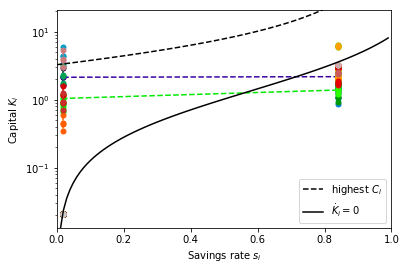

In [13]:
# animations
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import matplotlib.colors as colors

n_agents = 100
start, stop = 0, 3000
fig, (ax) = plt.subplots()
ax.set_xlabel(r'Savings rate $s_i$')


ax.set_ylabel(r'Capital $K_i$')
#ax.set_prop_cycle(color= [plt.cm.spectral(k) for k in np.linspace(0,1,n_agents)])

# ax2.set_xlabel(r'Savings rate $s_i$')
# ax2.set_xlim((0,1))
# ax2.set_ylim((0,100))

n_points=4
def animate(i):
    for lnum,line in enumerate(lines):
        if lnum < len(lines)-2:
            line.set_data(S[i+start-n_points:i+start,lnum],K[i+start-n_points:i+start,lnum])
            line.set_markerfacecolor(colors.rgb2hex(plt.cm.spectral((lnum+1.) / n_agents)[0:3]))
            #line.set_alpha([0.9,0.5])
        elif lnum < len(lines)-1:
            line.set_data(np.arange(0,1,0.01),
                          ((np.max(C[i+start,:])/(1.- np.arange(0,1,0.01))) -traj['wage'].values[i+start]/100.) /\
                          (traj['r'].values[i+start]))
              
            line.set_color('k')
            line.set_marker('')
            line.set_linestyle('--')
        else:
            line.set_data(np.arange(0,1,0.01), (traj['wage'].values[i+start]/N) / \
                          ( (delta/100.)/np.arange(0,1,0.01)  - traj['r'].values[i+start]))
              
            line.set_color('k')
            line.set_marker('')
            line.set_linestyle('-')
            
        #ax2.hist(S[i+start,:],bins=20)
    return tuple(lines)

def init():
    for a, line in enumerate(lines):
        line.set_data([],[])
        line.set_marker('o')
        line.set_markersize(5)
        line.set_linestyle('--')
        #line.set_markeredgecolor('%s')
        #line.set_color(plt.cm.spectral((a+1) / float(n_agents)))
    
    return lines

lines=[]
for k in range(n_agents+2):
    lobj = ax.plot([],[],
                  color=plt.cm.spectral((k+1.) / n_agents) )[0]
    lines.append(lobj)
    
#x = S[start,:n_agents]
#line, = ax.plot(x, K[start,:n_agents])
ax.set_xlim(( 0, 1))
ax.set_ylim((K[start:stop,:n_agents].min(), K[start:stop,:n_agents].max() ))
ax.set_yscale('log')
import matplotlib.lines as mlines
dotted_line = mlines.Line2D([], [], color='k', ls='--', label=r'highest $C_i$')
kidot = mlines.Line2D([], [], color='k', ls='-', label=r'$\dot{K}_i=0$')
ax.legend(handles=[dotted_line,kidot],loc = 'lower right')


#ax.legend([r'$\dot{K}_i=0$'],loc = 'lower right')
ani = animation.FuncAnimation(fig, animate, np.arange(start, stop), init_func=init,
                              interval=50, blit=True)
HTML(ani.to_html5_video())
#ani.save('Wippe_all_C.mp4')

In [ ]:
#np.random.uniform(0, 0)
ani.save('Wippe_all_CK_0to3000_history5.mp4')

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in divide


0 5000


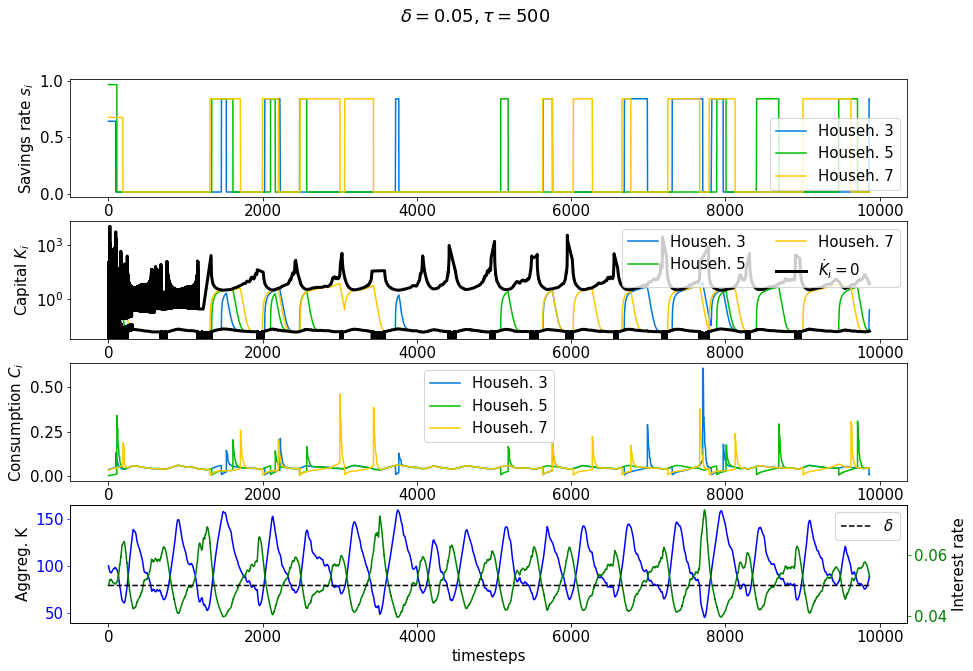

In [134]:
#### for plotting single households ####

plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 0,5000#len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)

L=0.05


n=4
for a,i in enumerate([3,5,7]):
    ax1.plot(traj.index[start:stop],S[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#, alpha=0.955);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#,alpha=0.955);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#,alpha=0.955);
    ax3.set_ylabel(r'Consumption $C_i$')
ax1.legend()
ax3.legend()
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
     kidotzero_high[np.nonzero(kidotzero_high)],
     'k',lw=3,label=r'$\dot{K}_i=0$');
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
     kidotzero_low[np.nonzero(kidotzero_low)],
     'k',lw=3,label=r'$\dot{K}_i=0$');
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
#ax1.legend();
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
ax2.set_yscale('log')
#ax2.set_ylim(0,9)

ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='g');
ax5.plot(traj.index[start:stop],delta/100. +0*traj.index[start:stop],
         'k--',label=r'$\delta$');
ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
fig.savefig('delta_%s_start%s_stop%s_three.pdf'%(delta,start,stop))


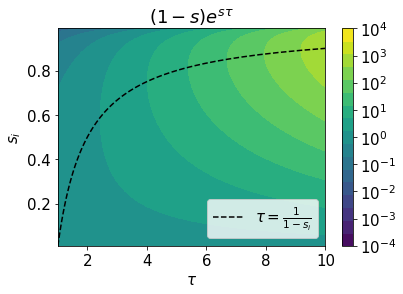

In [314]:
# try (1-s)exp(s tau)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
u = np.linspace(0.01, 0.99, 100)
v = np.logspace(0.001, 1., 100)
X, Y = np.meshgrid(u, v)
Z = (1-X)*np.exp(X*Y)


fig2=plt.figure()
ax=fig2.add_subplot(111)
c = ax.contourf(Y, X, Z, zdir='z', norm=colors.LogNorm(),levels=np.logspace(-4,4,18))
ax.plot( 1./(1.-u),u,'k--',label=r'$\tau=\frac{1}{1-s_i}$')
ax.legend()

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(-4,4,9))
cb.set_ticklabels(np.logspace(-4,4,9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$(1-s)e^{s\tau}$')
ax.set_xlim(min(v),max(v))
fig.savefig('C_hat.pdf')

plt.show()
